# Predictions and Model Evaluations

In [ ]:
import os
import sys

# Change to project root
os.chdir("..")  #

sys.path.append("src")

from load_datas import load_data

# Load the data
X_train_resampled, y_train, X_test, y_test = load_data()



In [4]:
import joblib

# Load saved models
log_reg = joblib.load('models/logistic_regression_model.pkl')
rf_model = joblib.load('models/random_forest_model.pkl')


c:\Users\arsem\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:380: InconsistentVersionWarning: Trying to unpickle estimator LogisticRegression from version 1.6.1 when using version 1.6.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\arsem\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:380: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.6.1 when using version 1.6.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\arsem\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:380: InconsistentVersionWarning: Trying to unpi

In [5]:
# Predict labels
y_pred_logreg = log_reg.predict(X_test)
y_pred_rf = rf_model.predict(X_test)


In [6]:

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, f1_score
from sklearn.metrics import average_precision_score

# Evaluate Logistic Regression
print("\nEvaluating Logistic Regression...")
print(confusion_matrix(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))
print("AUC-ROC:", roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1]))
print("F1-Score:", f1_score(y_test, y_pred_logreg))

# Evaluate Random Forest
print("\nEvaluating Random Forest...")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print("AUC-ROC:", roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1]))
print("F1-Score:", f1_score(y_test, y_pred_rf))
print("AUC-PR:", average_precision_score(y_test, rf_model.predict_proba(X_test)[:, 1]))

print("\nModel training and evaluation complete.")




Evaluating Logistic Regression...
[[26920   473]
 [ 1243  1587]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     27393
           1       0.77      0.56      0.65      2830

    accuracy                           0.94     30223
   macro avg       0.86      0.77      0.81     30223
weighted avg       0.94      0.94      0.94     30223

AUC-ROC: 0.8362136183201223
F1-Score: 0.649079754601227

Evaluating Random Forest...
[[27263   130]
 [ 1326  1504]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     27393
           1       0.92      0.53      0.67      2830

    accuracy                           0.95     30223
   macro avg       0.94      0.76      0.82     30223
weighted avg       0.95      0.95      0.95     30223

AUC-ROC: 0.839662488895115
F1-Score: 0.6738351254480287
AUC-PR: 0.699225375238937

Model training and evaluation complete.


## Visualizations for the models evaluation

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    confusion_matrix, roc_curve, precision_recall_curve,
    auc, RocCurveDisplay, PrecisionRecallDisplay
)


In [8]:
# Confusion Matrix Heatmap
def plot_conf_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# ROC Curve
def plot_roc_curve(y_true, y_proba, model_name):
    fpr, tpr, _ = roc_curve(y_true, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(5, 4))
    plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.title(f"{model_name} - ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.show()

# Precision-Recall Curve
def plot_pr_curve(y_true, y_proba, model_name):
    precision, recall, _ = precision_recall_curve(y_true, y_proba)
    pr_auc = auc(recall, precision)
    plt.figure(figsize=(5, 4))
    plt.plot(recall, precision, label=f"AUC = {pr_auc:.2f}")
    plt.title(f"{model_name} - Precision-Recall Curve")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.legend()
    plt.show()

## Plot for logistic regression

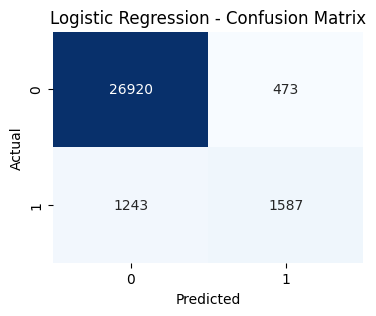

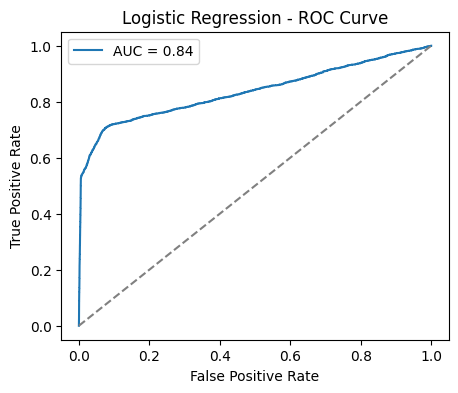

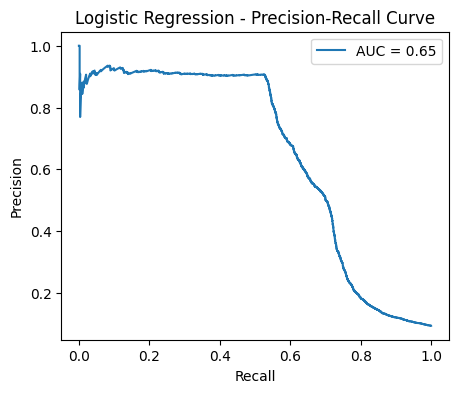

In [9]:
plot_conf_matrix(y_test, y_pred_logreg, "Logistic Regression")
plot_roc_curve(y_test, log_reg.predict_proba(X_test)[:, 1], "Logistic Regression")
plot_pr_curve(y_test, log_reg.predict_proba(X_test)[:, 1], "Logistic Regression")


## PLots for Random Forest

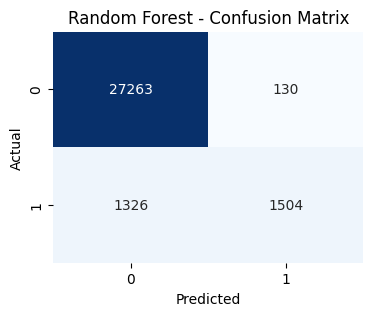

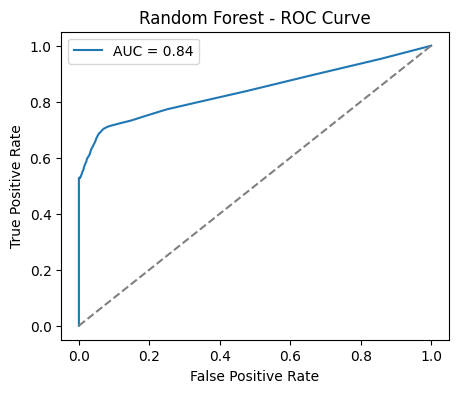

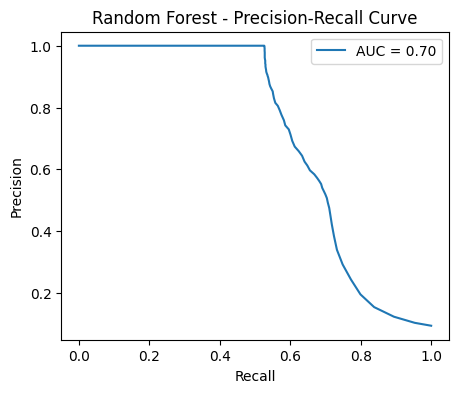

In [10]:
plot_conf_matrix(y_test, y_pred_rf, "Random Forest")
plot_roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1], "Random Forest")
plot_pr_curve(y_test, rf_model.predict_proba(X_test)[:, 1], "Random Forest")

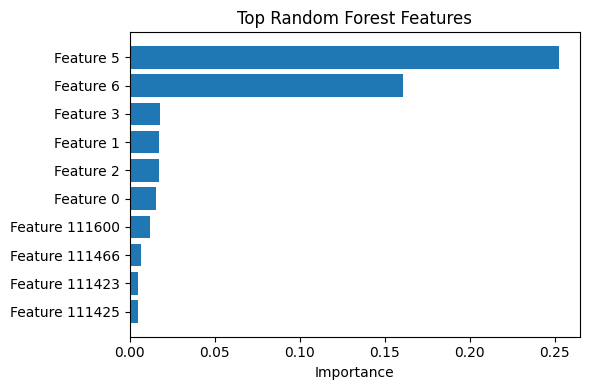

In [11]:
import pandas as pd

def plot_feature_importance(model, top_n=10):
    importances = model.feature_importances_
    top_indices = importances.argsort()[-top_n:][::-1]
    
    plt.figure(figsize=(6, 4))
    plt.barh(range(top_n), importances[top_indices][::-1])
    plt.yticks(range(top_n), [f"Feature {i}" for i in top_indices][::-1])
    plt.xlabel("Importance")
    plt.title("Top Random Forest Features")
    plt.tight_layout()
    plt.show()

plot_feature_importance(rf_model)


# Comparison and Analysis of Logistic Regression and Random Forest Models

## 1. Confusion Matrices

### Logistic Regression:
- True Negatives (TN): 26,920
- False Positives (FP): 473
- False Negatives (FN): 1,243
- True Positives (TP): 1,587

### Random Forest:
- True Negatives (TN): 27,263
- False Positives (FP): 130
- False Negatives (FN): 1,326
- True Positives (TP): 1,504

### Analysis:
- Both models show a high number of true negatives, indicating that they are effective at predicting the negative class.
- Random Forest has fewer false positives (130) compared to Logistic Regression (473), suggesting better performance in accurately identifying the negative class.
- Random Forest also has a lower number of false negatives (1,326) compared to Logistic Regression (1,243), indicating it better captures the positive class.

## 2. ROC Curves

- **Logistic Regression:** AUC = 0.84
- **Random Forest:** AUC = 0.84

### Analysis:
- Both models have the same AUC value of 0.84, indicating a similar ability to differentiate between positive and negative classes. The ROC curves for both models suggest that they perform well overall.

## 3. Precision-Recall Curves

- **Logistic Regression:** AUC = 0.65
- **Random Forest:** AUC = 0.70

### Analysis:
- The Precision-Recall curve for Random Forest (AUC = 0.70) indicates better precision at lower recall levels compared to Logistic Regression (AUC = 0.65). This suggests that Random Forest is more effective in maintaining precision while recalling positive instances.

## Conclusion

### Performance Summary:
- **Accuracy:** Random Forest outperforms Logistic Regression in terms of fewer false positives and false negatives.
- **AUC Values:** Both models show similar AUC in the ROC curves, but Random Forest has a better AUC in the Precision-Recall curve, indicating superior performance in identifying positive cases.